In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


First Data Overview

На самом первом этапе загрузите данные в сессию используя функции библиотеки Pandas, проверьте данные и переименуйте столбцы в более удобные названия 
(без пробелов)


In [2]:
# Загрузка данных
df_original = pd.read_excel('C:/Users/bauyr/Desktop/Day 5 Dataset.xlsx')
df_original.shape

(10909, 20)

In [3]:
# Вывести несколько первых строк таблицы данных
df_original.head()

,ID водителя,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Модель,Марка,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,Alfa romeo,156,Легковые автомобили,2000-12-01,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaT,NaN,NaN
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,Alfa romeo,156,Легковые автомобили,2001-12-01,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaT,NaN,NaN
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Aprilia,Rsv 1000r,Мотоциклы и мотороллеры,2005-12-01,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaT,NaN,NaN
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,Audi,80,Легковые автомобили,1992-12-01,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaT,NaN,NaN
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,Audi,С4,Легковые автомобили,1995-12-01,Слева,2800,серый металлик,28.05.2013-27.05.2014,8257,NaN,NaT,NaN,NaN


In [4]:
# Создание копии данных 
df = df_original.copy()

In [5]:
# Удаление пробелов из названий столбцов
df.columns = [col.replace(' ', '') for col in df.columns]
# Вывести несколько первых строк таблицы данных
df.head()

,IDводителя,"Возраст,полныхлет",Гражданство,Стажвождения,Пол,КБМ,Город,Модель,Марка,ТипТС,Годвыпуска,Расположениеруля,Объёмдвигателя,Цвет,Периодстрахования,Страховаяпремия,Льготы,Датапроишествия,РегионДТП,Суммаубытка
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,Alfa romeo,156,Легковые автомобили,2000-12-01,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaT,NaN,NaN
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,Alfa romeo,156,Легковые автомобили,2001-12-01,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaT,NaN,NaN
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Aprilia,Rsv 1000r,Мотоциклы и мотороллеры,2005-12-01,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaT,NaN,NaN
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,Audi,80,Легковые автомобили,1992-12-01,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaT,NaN,NaN
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,Audi,С4,Легковые автомобили,1995-12-01,Слева,2800,серый металлик,28.05.2013-27.05.2014,8257,NaN,NaT,NaN,NaN


Data Processing 
1) Удалите дубликаты в данных. Будьте осторожны при выборе дубликатов – необходимо удалить полные дубликаты. 

In [6]:
# Пометка дубликатов
df[df.duplicated(keep=False)]


,IDводителя,"Возраст,полныхлет",Гражданство,Стажвождения,Пол,КБМ,Город,Модель,Марка,ТипТС,Годвыпуска,Расположениеруля,Объёмдвигателя,Цвет,Периодстрахования,Страховаяпремия,Льготы,Датапроишествия,РегионДТП,Суммаубытка
501,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,Audi,80,Легковые автомобили,1991-12-01,Слева,1595,светло-зелёный,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN
502,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,Audi,80,Легковые автомобили,1991-12-01,Слева,1595,светло-зелёный,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN
896,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,BMW,318,Легковые автомобили,1991-12-01,Слева,1796,синий,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN
897,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,BMW,318,Легковые автомобили,1991-12-01,Слева,1796,синий,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN
1317,e4c39e890cbca63d3d4094622b2beb3e,57,Казахстан,21,М,9,Актобе,Dong Feng,Прочие,Легковые автомобили,2013-12-01,Слева,2156,белый,04.06.2013-03.12.2013,3955,Инвалид,NaT,NaN,NaN
1318,e4c39e890cbca63d3d4094622b2beb3e,57,Казахстан,21,М,9,Актобе,Dong Feng,Прочие,Легковые автомобили,2013-12-01,Слева,2156,белый,04.06.2013-03.12.2013,3955,Инвалид,NaT,NaN,NaN
1512,2252acc4a95b01ac2b4221a9a39598d6,54,Казахстан,19,М,9,Алматы,Honda,Shuttle,Легковые автомобили,1990-12-01,Слева,1590,белый,14.06.2013-13.06.2014,21262,NaN,NaT,NaN,NaN
1513,2252acc4a95b01ac2b4221a9a39598d6,54,Казахстан,19,М,9,Алматы,Honda,Shuttle,Легковые автомобили,1990-12-01,Слева,1590,белый,14.06.2013-13.06.2014,21262,NaN,NaT,NaN,NaN
1711,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,Honda,Cr-v,Легковые автомобили,1996-12-01,Слева,1700,вишневый металлик,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN
1712,b7c927b072a0912dbdc401d48ad68134,55,Казахстан,24,М,9,Петропавловск,Honda,Cr-v,Легковые автомобили,1996-12-01,Слева,1700,вишневый металлик,13.06.2013-21.05.2014,6615,NaN,NaT,NaN,NaN


In [7]:
# Сохранение количества строк до удаления дубликатов
original_count = len(df)

# Удаление полных дубликатов
df.drop_duplicates(inplace=True)

# Обновление индекса для устранения пропусков в нумерации
df.reset_index(drop=True, inplace=True)

# Расчет количества удаленных дубликатов
duplicates_removed = original_count - len(df)

# Вывод результатов
print("Количество строк до удаления дубликатов:", original_count)
print("Количество строк после удаления дубликатов и переиндексации:", len(df))
print("Количество удаленных дубликатов:", duplicates_removed)
print("Все дубликаты были удалены")
df


Количество строк до удаления дубликатов: 10909
Количество строк после удаления дубликатов и переиндексации: 10885
Количество удаленных дубликатов: 24
Все дубликаты были удалены


,IDводителя,"Возраст,полныхлет",Гражданство,Стажвождения,Пол,КБМ,Город,Модель,Марка,ТипТС,Годвыпуска,Расположениеруля,Объёмдвигателя,Цвет,Периодстрахования,Страховаяпремия,Льготы,Датапроишествия,РегионДТП,Суммаубытка
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,Alfa romeo,156,Легковые автомобили,2000-12-01,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaT,NaN,NaN
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,Alfa romeo,156,Легковые автомобили,2001-12-01,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaT,NaN,NaN
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Aprilia,Rsv 1000r,Мотоциклы и мотороллеры,2005-12-01,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaT,NaN,NaN
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,Audi,80,Легковые автомобили,1992-12-01,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaT,NaN,NaN
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,Audi,С4,Легковые автомобили,1995-12-01,Слева,2800,серый металлик,28.05.2013-27.05.2014,8257,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,c6a3b53d633ff4155492e2e19b9a8010,57,Казахстан,35,М,8,Павлодар,Шевроле,Нива 212300-55,Легковые автомобили,2012-12-01,Слева,1690,серый металлик,12.06.2013-10.04.2014,6976,NaN,NaT,NaN,NaN
10881,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Шевроле,Нива 212300-55I,Легковые автомобили,2012-01-01,Слева,1690,серебристый,16.06.2013-15.06.2014,6400,NaN,NaT,NaN,NaN
10882,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Шевроле,Нива 212300-55I,Легковые автомобили,2010-12-01,Слева,1700,снежная королева,18.06.2013-17.06.2014,10053,NaN,NaT,NaN,NaN
10883,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Шевроле,Нива 212300-55glc,Легковые автомобили,2011-12-01,Слева,1690,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,NaT,NaN,NaN


2) Заполните пустые поля (Missing data) в определенных столбцах значениями (Imputation) – в некоторых случаях необходимо продумать логику. 

In [8]:
# Вывод количества пропущенных значений по столбцам до импутации
print("Пропущенные значения до импутации:")
df.isna().sum()

Пропущенные значения до импутации:


IDводителя               0
Возраст,полныхлет        0
Гражданство              0
Стажвождения             0
Пол                      0
КБМ                      0
Город                    0
Модель                   0
Марка                    0
ТипТС                    0
Годвыпуска               0
Расположениеруля         0
Объёмдвигателя           0
Цвет                     0
Периодстрахования        0
Страховаяпремия          0
Льготы                9692
Датапроишествия      10750
РегионДТП            10750
Суммаубытка          10751
dtype: int64

In [9]:

# 1. Находим моду каждой группы по столбцу 'РегионДТП'
mode_by_group = df.groupby('Город')['РегионДТП'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# 2.Если мода не найдена, возвращаем 'Неизвестно'
mode_by_group = df.groupby('Город')['РегионДТП'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Неизвестно')

# 2. Заполняем пропущенные значения модой в каждой группе, или 'Неизвестно', если моды нет
df['РегионДТП'] = df['РегионДТП'].fillna(mode_by_group)

# 3. Условная импутация для 'Льготы'
df['Годвыпуска'] = pd.to_datetime(df['Годвыпуска'], errors='coerce').dt.year  # Добавлен errors='coerce' на случай нестандартных данных
def impute_benefits(row):
    age = row['Возраст,полныхлет']
    car_year = row['Годвыпуска']
    current_year = 2013
    if pd.isnull(car_year) or pd.isnull(age):  # Проверка на NaN значения
        return None
    if age > 60 or (current_year - car_year) <= 5:
        return 'Есть льготы'
    else:
        return 'Нет льгот'
df['Льготы'] = df.apply(lambda row: impute_benefits(row) if pd.isnull(row['Льготы']) else row['Льготы'], axis=1)

# 4. Конвертация и импутация дат
# Преобразование 'Периодстрахования' к строкам перед разделением
df[['НачалоПериодаСтрахования', 'КонецПериодаСтрахования']] = df['Периодстрахования'].astype(str).str.split('-', expand=True)

# После этого конвертируем в datetime
df['НачалоПериодаСтрахования'] = pd.to_datetime(df['НачалоПериодаСтрахования'], dayfirst=True, errors='coerce')
df['КонецПериодаСтрахования'] = pd.to_datetime(df['КонецПериодаСтрахования'], dayfirst=True, errors='coerce')

# Вычисление средней даты и импутация в 'Датапроишествия'
df['СредняяДата'] = df['НачалоПериодаСтрахования'] + (df['КонецПериодаСтрахования'] - df['НачалоПериодаСтрахования']) / 2
df['Датапроишествия'] = df['Датапроишествия'].fillna(df['СредняяДата'])



# Вычисляем среднюю 'Сумма убытка' для каждой группы 'Марка', 'Модель', 'КБМ'
average_loss_by_model_kbm = df.groupby(['Марка', 'Модель', 'КБМ'])['Суммаубытка'].mean().reset_index(name='СредняяСуммаУбытка')

# Объединяем исходный датафрейм с вычисленными средними значениями
df = df.merge(average_loss_by_model_kbm, on=['Марка', 'Модель', 'КБМ'], how='left')

# Заполняем пропущенные значения в 'Суммаубытка' используя средние значения
df['Суммаубытка'] = df.apply(
    lambda row: row['СредняяСуммаУбытка'] if pd.isnull(row['Суммаубытка']) and not pd.isnull(row['СредняяСуммаУбытка']) else row['Суммаубытка'], 
    axis=1
)

# Вычисляем медианные значения для 'Марка', 'Модель', 'КБМ'
median_by_kbm = df.groupby(['Марка', 'Модель', 'КБМ'])['Суммаубытка'].median().reset_index()
median_by_model = df.groupby(['Марка', 'Модель'])['Суммаубытка'].median().reset_index()
median_by_mark = df.groupby('Марка')['Суммаубытка'].median().reset_index()

# Объединяем с исходным датафреймом
df = df.merge(median_by_kbm, on=['Марка', 'Модель', 'КБМ'], how='left', suffixes=('', '_kbm'))
df = df.merge(median_by_model, on=['Марка', 'Модель'], how='left', suffixes=('', '_model'))
df = df.merge(median_by_mark, on='Марка', how='left', suffixes=('', '_mark'))

# Применяем иерархическую импутацию и заполняем нулями, если значение не найдено
df['Суммаубытка'] = df.apply(
    lambda row: row['Суммаубытка_kbm'] if not pd.isnull(row['Суммаубытка_kbm'])
    else (row['Суммаубытка_model'] if not pd.isnull(row['Суммаубытка_model'])
    else (row['Суммаубытка_mark'] if not pd.isnull(row['Суммаубытка_mark'])
    else 0)),  # Заполняем нулями, если медианные значения отсутствуют
    axis=1
)
# Удаление ненужных столбцов должно происходить только после всех операций импутации
df.drop(['НачалоПериодаСтрахования', 'КонецПериодаСтрахования', 'СредняяДата','Суммаубытка_kbm', 'Суммаубытка_model', 'Суммаубытка_mark'] , axis=1, inplace=True)
df.drop(['СредняяСуммаУбытка'], axis=1, inplace=True)
df.head()

,IDводителя,"Возраст,полныхлет",Гражданство,Стажвождения,Пол,КБМ,Город,Модель,Марка,ТипТС,Годвыпуска,Расположениеруля,Объёмдвигателя,Цвет,Периодстрахования,Страховаяпремия,Льготы,Датапроишествия,РегионДТП,Суммаубытка
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,Alfa romeo,156,Легковые автомобили,2000,Слева,3000,красный,14.06.2013-13.06.2014,17625,Нет льгот,2013-12-13 00:00:00,Алматы,0.0
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,Alfa romeo,156,Легковые автомобили,2001,Слева,2387,синий,19.07.2013-18.07.2014,8484,Нет льгот,2014-01-17 00:00:00,Нур-Султан,0.0
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Aprilia,Rsv 1000r,Мотоциклы и мотороллеры,2005,Слева,998,красный,07.06.2013-06.06.2014,8031,Нет льгот,2013-12-06 00:00:00,Алматы,0.0
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,Audi,80,Легковые автомобили,1992,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,Нет льгот,2013-08-29 12:00:00,Нур-Султан,46612.0
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,Audi,С4,Легковые автомобили,1995,Слева,2800,серый металлик,28.05.2013-27.05.2014,8257,Нет льгот,2013-11-26 00:00:00,Неизвестно,259420.0


In [10]:
# Вывод количества пропущенных значений по столбцам после импутации
print("Пропущенные значения до импутации:")
df.isnull().sum()

Пропущенные значения до импутации:


IDводителя           0
Возраст,полныхлет    0
Гражданство          0
Стажвождения         0
Пол                  0
КБМ                  0
Город                0
Модель               0
Марка                0
ТипТС                0
Годвыпуска           0
Расположениеруля     0
Объёмдвигателя       0
Цвет                 0
Периодстрахования    0
Страховаяпремия      0
Льготы               0
Датапроишествия      0
РегионДТП            0
Суммаубытка          0
dtype: int64

3) Сконцентрируйте ваш проект только на легковых автомобилях не старше 25-и лет. Исключите автобусы, прицепы и мотоциклы. * Имейте в виду что датасет 2013 года.   

In [11]:
current_year = 2013
df['Возраст'] = current_year - df['Годвыпуска']

filtered_df = df[(df['ТипТС'] == 'Легковые автомобили') & (df['Возраст'] <= 25)]

# Сортировка данных по типу автомобиля и возрасту
sorted_df = filtered_df.sort_values(by=['ТипТС', 'Возраст'])

# Вывод отсортированных данных
sorted_df[['ТипТС', 'Годвыпуска','Возраст']]

,ТипТС,Годвыпуска,Возраст
721,Легковые автомобили,2013,0
988,Легковые автомобили,2013,0
994,Легковые автомобили,2013,0
997,Легковые автомобили,2013,0
998,Легковые автомобили,2013,0
...,...,...,...
10799,Легковые автомобили,1988,25
10804,Легковые автомобили,1988,25
10814,Легковые автомобили,1988,25
10843,Легковые автомобили,1988,25


4) Приведите в порядок значения в столбцах Город и Год выпуска. Для года выпуска достаточно информации о Годе, без дня и месяца.  

In [12]:
# Функция для замены значения в столбце "Город"
def replace_city(value):
    if ',' in value:
        return value.split(',')[0].strip()
    else:
        return value

# Применяем функцию к столбцу "Город"
df['Город'] = df['Город'].apply(replace_city)


# Преобразуем столбец "Год выпуска" к типу данных datetime, чтобы избавиться от дня и месяца
df['Годвыпуска'] = pd.to_datetime(df['Годвыпуска'], errors='coerce').dt.year

# Вывод отсортированных данных
sorted_df[['Город', 'Годвыпуска']]


,Город,Годвыпуска
721,Костанай,2013
988,Алматы,2013
994,Нур-Султан,2013
997,Кокшетау,2013
998,Кендала,2013
...,...,...
10799,"Красный Яр,Красный Яр",1988
10804,Павлодар,1988
10814,Петропавловск,1988
10843,Лозовое,1988


5) Исключите из расчётов записи страховок сроком менее 30-и дней - для них страховая политика формируется другим образом. Убедитесь что при расчёте модели, цена корректная в зависимости от времени страховки.  

In [13]:
def get_duration_days(period):
    start, end = period.split('-')
    start_date = pd.to_datetime(start, format='%d.%m.%Y')
    end_date = pd.to_datetime(end, format='%d.%m.%Y')
    return (end_date - start_date).days

# Применяем новую функцию к столбцу 'Периодстрахования'
df['ПродолжительностьСтрахованияДни'] = df['Периодстрахования'].apply(get_duration_days)

# Фильтруем записи со страховым периодом менее 30 дней
df_filtered = df[df['ПродолжительностьСтрахованияДни'] >= 30]

# Выводим оставшиеся записи для проверки
df_filtered[['ПродолжительностьСтрахованияДни', 'Страховаяпремия']]


,ПродолжительностьСтрахованияДни,Страховаяпремия
0,364,17625
1,364,8484
2,364,8031
3,183,6709
4,364,8257
...,...,...
10880,302,6976
10881,364,6400
10882,364,10053
10883,364,5052



Basic Statistics and Data Visualizations 


1) Для каждого из полей, выполните базовую статистику (напр. средние знач., квартили, стандартное отклонение) - сделайте первые выводы на основании результатов 

In [14]:
# Выполнение базовой статистики для числовых полей
print("Basic Statistics for Numerical Fields:")
basic_stats_numerical = df.describe()
basic_stats_numerical.transpose()
#на самом деле тут столбец Датапроишествия мы его меняли на тип int для расчетов


Basic Statistics for Numerical Fields:


,count,mean,min,25%,50%,75%,max,std
"Возраст,полныхлет",10885.0,47.349196,24.0,37.0,46.0,56.0,91.0,12.800011
Стажвождения,10885.0,18.017639,0.0,12.0,18.0,20.0,88.0,8.779825
КБМ,10885.0,7.365733,1.0,7.0,8.0,9.0,9.0,1.706157
Годвыпуска,10885.0,1970.0,1970.0,1970.0,1970.0,1970.0,1970.0,0.0
Объёмдвигателя,10885.0,2392.356821,390.0,1700.0,2000.0,2700.0,18000.0,1333.285486
Страховаяпремия,10885.0,10929.184658,66.0,6400.0,9474.0,15667.0,59669.0,5732.659677
Датапроишествия,10885,2013-11-19 17:11:17.005053184,2013-05-25 00:00:00,2013-11-18 00:00:00,2013-12-03 00:00:00,2013-12-18 00:00:00,2014-11-17 00:00:00,NaN
Суммаубытка,10885.0,164601.710443,0.0,0.0,0.0,259420.0,2525000.0,321015.698035
Возраст,10885.0,13.78576,0.0,7.0,14.0,20.0,58.0,7.73949
ПродолжительностьСтрахованияДни,10885.0,321.900597,4.0,333.0,364.0,364.0,364.0,78.465547


In [15]:
# Вывод статистики для всех полей, включая категориальные данные
print("\nBasic Statistics for All Fields:")
basic_stats_all = df.describe(include='all')
basic_stats_all.transpose()


Basic Statistics for All Fields:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
IDводителя,10885,9420,ddece7b2c11c98067d2afb2c5f9b76a4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Возраст,полныхлет",10885.0,NaN,NaN,NaN,47.349196,24.0,37.0,46.0,56.0,91.0,12.800011
Гражданство,10885,7,Казахстан,10842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Стажвождения,10885.0,NaN,NaN,NaN,18.017639,0.0,12.0,18.0,20.0,88.0,8.779825
Пол,10885,2,М,9205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
КБМ,10885.0,NaN,NaN,NaN,7.365733,1.0,7.0,8.0,9.0,9.0,1.706157
Город,10885,363,Алматы,4037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Модель,10885,130,Toyota,2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Марка,10885,1105,Camry,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ТипТС,10885,7,Легковые автомобили,10493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 2.1 Сколько максимально автомобилей у одного человека
max_cars_per_person = df['IDводителя'].value_counts().max()
max_cars_per_person

18

In [17]:
# 2.2 Найдите соотношение аварий по полу - Мужчины и Женщины
accidents_by_gender_ratio = df['Пол'][df['Датапроишествия'].notna()].value_counts(normalize=True)
accidents_by_gender_ratio

Пол
М    0.845659
Ж    0.154341
Name: proportion, dtype: float64

In [18]:
# 2.3 Какое количество автомобилей купили страховку в наиболее крупных городах Казахстана
insurance_in_cities = df[df['Город'].isin(['Нур-Султан', 'Алматы', 'Шымкент', 'Атырау'])]['Город'].value_counts()
insurance_in_cities

Город
Алматы        4037
Нур-Султан    1101
Атырау         103
Шымкент         35
Name: count, dtype: int64

In [19]:
# 2.4 Какие 3 модели автомобилей являются наиболее популярными среди Казахстанцев?
top_3_car_models = df['Модель'].value_counts().head(3)
top_3_car_models

Модель
Toyota        2177
Volkswagen    1054
ВАЗ            892
Name: count, dtype: int64

In [20]:
# 2.5 На какой срок в основном покупают страховку Казахстанцы?
most_common_insurance_period = df['Периодстрахования'].mode()
most_common_insurance_period

0    15.06.2013-14.06.2014
Name: Периодстрахования, dtype: object

In [21]:
# 2.6 Проанализируйте города и времена года, когда происходило больше всего аварий

df['Месяц'] = pd.to_datetime(df['Датапроишествия']).dt.month
seasons = {1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна', 6: 'Лето', 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень', 11: 'Осень', 12: 'Зима'}
df['Сезон'] = df['Месяц'].map(seasons)
accidents_by_city_and_season = df.groupby(['Город', 'Сезон']).size().reset_index(name='Количествоаварий')

# Сортировка для каждого сезона и выбор топ-3 городов с наибольшим количеством аварий
top_cities_by_season = (accidents_by_city_and_season
                         .sort_values(by=['Город', 'Количествоаварий'], ascending=[True, False])
                         .groupby('Сезон')
                         .apply(lambda x: x.nlargest(3, 'Количествоаварий'))
                         .reset_index(drop=True))

# Вывод результатов
print(top_cities_by_season)


            Город  Сезон  Количествоаварий
0          Алматы  Весна                13
1      Нур-Султан  Весна                 6
2        Кокшетау  Весна                 4
3          Алматы   Зима              2447
4          Актобе   Зима               542
5      Нур-Султан   Зима               529
6   Петропавловск   Лето               121
7      Нур-Султан   Лето               106
8          Алматы   Лето                74
9          Алматы  Осень              1503
10     Нур-Султан  Осень               460
11         Актобе  Осень               370


In [22]:
# 2.7 Попадали ли граждане других стран или автомобили с правым рулем в ДТП, и если да, какое их соотношение

foreigners = df[df['Гражданство'] != 'Казахстан']['IDводителя'].nunique()
right_hand_drive = df[df['Расположениеруля'] == 'Правый']['IDводителя'].nunique()
total_accidents = df['IDводителя'].nunique()
foreigners = foreigners / total_accidents
right_hand_drive = right_hand_drive / total_accidents
foreigners, right_hand_drive

(0.004140127388535032, 0.0)

In [23]:
df.dtypes

IDводителя                                 object
Возраст,полныхлет                           int64
Гражданство                                object
Стажвождения                                int64
Пол                                        object
КБМ                                         int64
Город                                      object
Модель                                     object
Марка                                      object
ТипТС                                      object
Годвыпуска                                  int32
Расположениеруля                           object
Объёмдвигателя                              int64
Цвет                                       object
Периодстрахования                          object
Страховаяпремия                             int64
Льготы                                     object
Датапроишествия                    datetime64[ns]
РегионДТП                                  object
Суммаубытка                               float64


In [24]:
# Категориальные столбцы для преобразования
categorical_columns = ['КБМ', 'Пол', 'Город']

# Преобразуем только указанные категориальные столбцы в числовые
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Исключаем столбцы, которые точно не нужны для анализа корреляции
columns_to_exclude = ['IDводителя', 'Возраст,полныхлет','Гражданство', 'Модель', 'Марка', 'ТипТС', 'Расположениеруля', 'Объёмдвигателя','Цвет', 'Периодстрахования', 
                      'Льготы', 'Датапроишествия', 'РегионДТП', 'Суммаубытка','ПродолжительностьСтрахованияДни','Сезон', 'Годвыпуска', 'Месяц', 'Сезон', ]
df_encoded = df_encoded.drop(columns=columns_to_exclude)
# Расчёт корреляции между 'Страховаяпремия' и другими числовыми переменными
# 3.1 Корреляция между переменными 'КБМ', 'Пол', 'Город' и 'Цена страховки'
correlation_insurance = df_encoded.corr()['Страховаяпремия'].sort_values()
correlation_insurance

Город_Атбасар         -0.239927
Город_Петропавловск   -0.237906
Пол_М                 -0.203593
Город_Актобе          -0.194538
Возраст               -0.190240
                         ...   
КБМ_2                  0.045612
Город_Атырау           0.055468
Пол_Ж                  0.203593
Город_Алматы           0.697372
Страховаяпремия        1.000000
Name: Страховаяпремия, Length: 377, dtype: float64

In [25]:
# 3.2 Проверка корреляции между 'Стаж вождения' и 'Возраст, полных лет'
# Для начала нужно убедиться, что данные числовые и в правильном формате
df['Стажвождения'] = pd.to_numeric(df['Стажвождения'], errors='coerce')
df['Возраст,полныхлет'] = pd.to_numeric(df['Возраст,полныхлет'], errors='coerce')

# Исключаем NaN значения для корректного расчета корреляции
df_clean = df.dropna(subset=['Стажвождения', 'Возраст,полныхлет'])

# Корреляция между 'Стаж вождения' и 'Возраст, полных лет'
correlation_experience_age = df_clean['Стажвождения'].corr(df_clean['Возраст,полныхлет'])

# Статистический тест корреляции
from scipy.stats import pearsonr
correlation_test = pearsonr(df_clean['Стажвождения'], df_clean['Возраст,полныхлет'])

(correlation_experience_age, correlation_test)

(0.5182321477189025, PearsonRResult(statistic=0.5182321477189009, pvalue=0.0))

In [26]:
# Конвертация даты проишествия в формат datetime
df['ДатаПроишествия'] = pd.to_datetime(df['Датапроишествия'], errors='coerce')
# Добавление столбца 'МесяцПроишествия', извлекая месяц из даты проишествия
df['МесяцПроишествия'] = df['ДатаПроишествия'].dt.month

# Определение вероятности происшествия в зимние месяцы
# Определение зимних месяцев: Декабрь (12), Январь (1), Февраль (2)
Winter = [12, 1, 2]
# Подсчет количества происшествий в зимние месяцы
CountWinterDTP = df[df['МесяцПроишествия'].isin(Winter)].shape[0]
# Подсчет общего количества происшествий
TotalCountDTP = df.shape[0]
# Расчет вероятности происшествия в зимнее время
pWinter = CountWinterDTP / TotalCountDTP

pWinter


0.5319246669728985

In [27]:
# 4.2 Вероятность ДТП в зимнее время в г. Алматы
AlmatyDTP_count = df[(df['МесяцПроишествия'].isin(Winter)) & (df['Город'] == 'Алматы')].shape[0]
pAlmatyDTP = AlmatyDTP_count / CountWinterDTP
pAlmatyDTP

0.4226252158894646

5.1 Гистограмма распределения по городам  


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

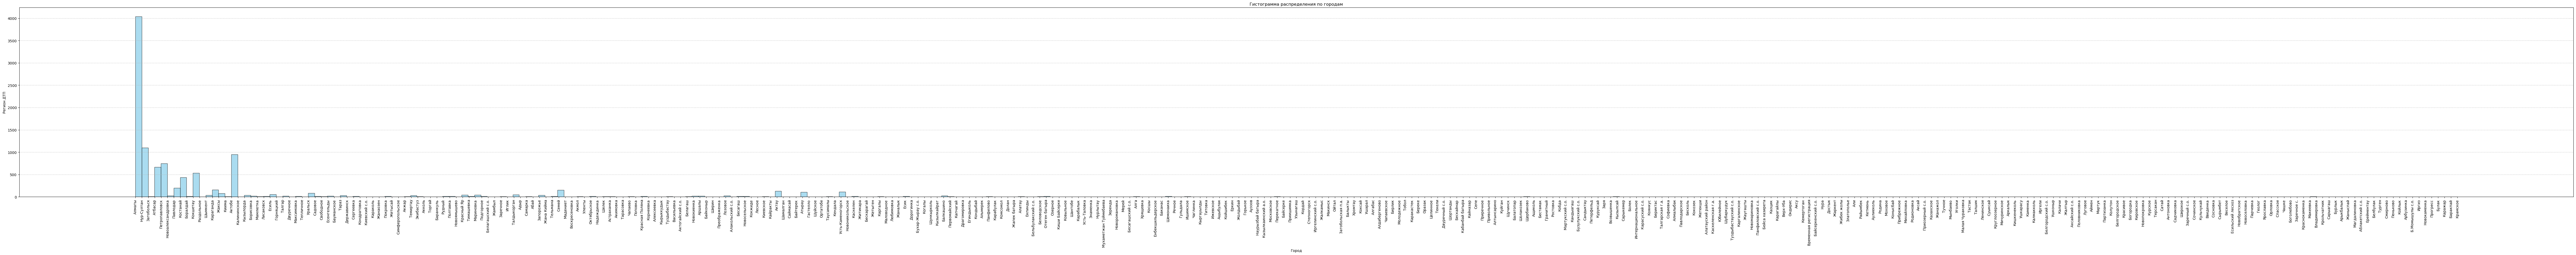

In [29]:

plt.figure(figsize=(100, 10))
plt.hist(df['Город'] , bins=len(df['Город'].unique()), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Город')
plt.ylabel('Регион ДТП')
plt.title('Гистограмма распределения по городам')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

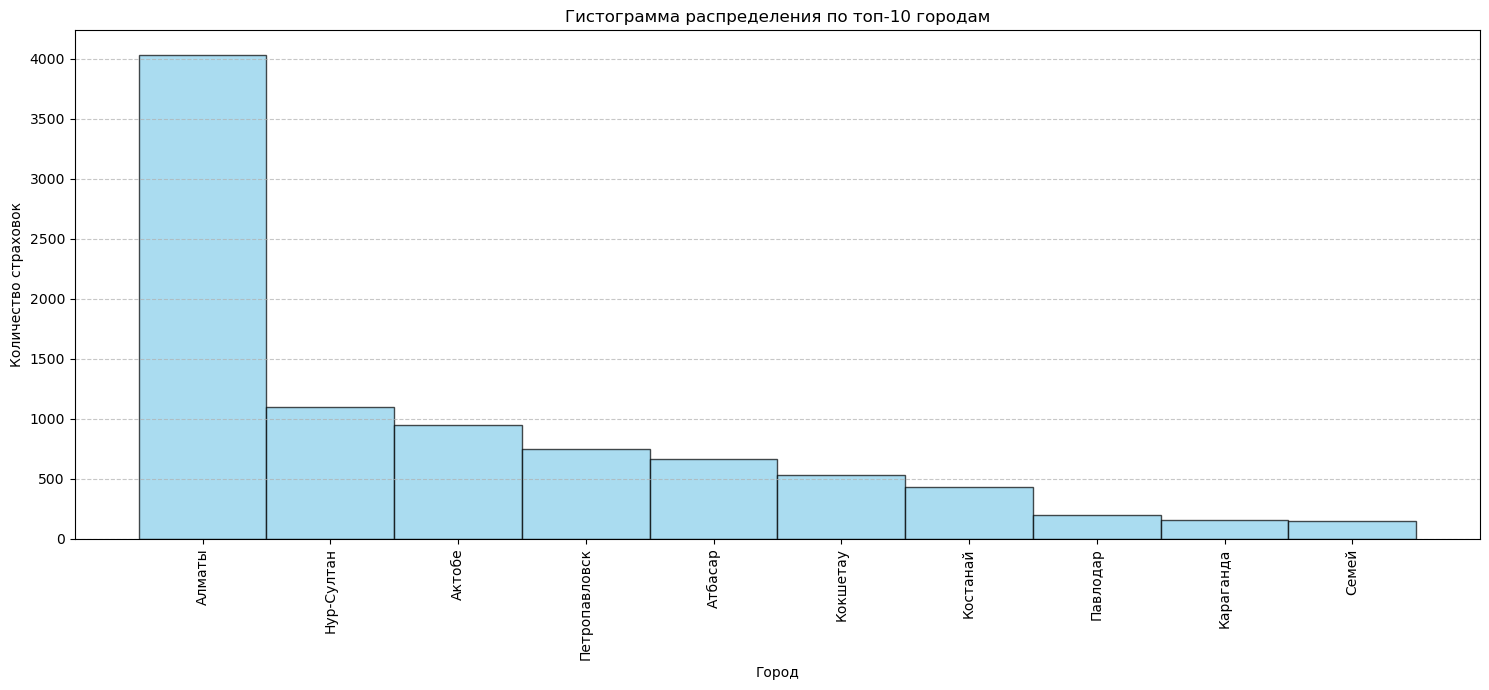

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем топ-10 городов по количеству упоминаний
top_cities = df['Город'].value_counts().head(10).index.tolist()

# Фильтруем датафрейм, чтобы оставить только данные по топ-10 городам
filtered_df = df[df['Город'].isin(top_cities)]

# Присваиваем каждому городу уникальный числовой идентификатор
city_to_id = {city: i for i, city in enumerate(top_cities)}
city_ids = filtered_df['Город'].map(city_to_id)

# Устанавливаем размер фигуры для графика
plt.figure(figsize=(15, 7))

# Создаем гистограмму, используя числовые идентификаторы городов
plt.hist(city_ids, bins=np.arange(len(top_cities)+1)-0.5, color='skyblue', edgecolor='black', alpha=0.7)

# Задаем подписи осей
plt.xlabel('Город')
plt.ylabel('Количество страховок')

# Задаем заголовок графика
plt.title('Гистограмма распределения по топ-10 городам')

# Задаем названия городов на оси X
plt.xticks(ticks=np.arange(len(top_cities)), labels=top_cities, rotation=90)

# Добавляем сетку на фон
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая коррекция размещения элементов на графике
plt.tight_layout()

# Отображаем график
plt.show()


5.2 Боксплоты для возраста с нахождением outliear меньше 25% и более 75% 

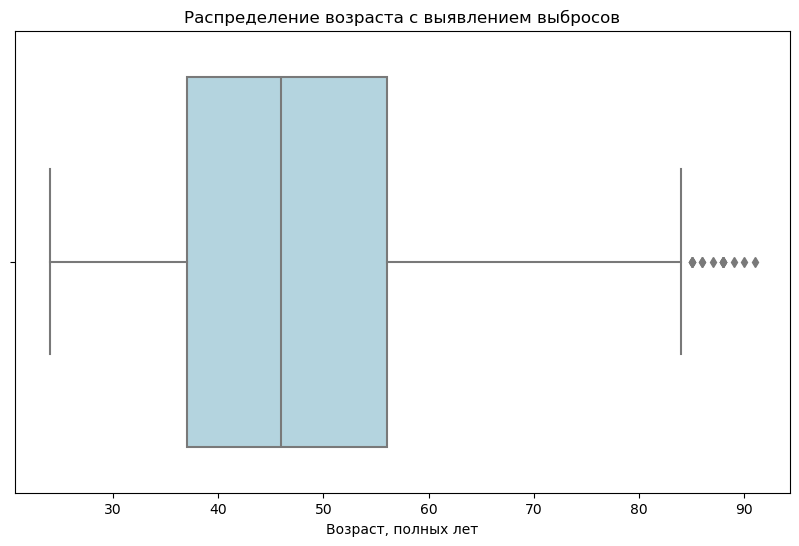

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер фигуры для графика
plt.figure(figsize=(10, 6))

# Создаем боксплот для возраста
sns.boxplot(x=df['Возраст,полныхлет'], color='lightblue')

# Добавляем заголовок и подписи к осям
plt.title('Распределение возраста с выявлением выбросов')
plt.xlabel('Возраст, полных лет')

# Отображаем график
plt.show()


Боксплот показывает медиану, первый и третий квартили (25% и 75%), а также "усы", которые обычно простираются до последних точек в пределах 1.5 IQR от квартилей. Точки, находящиеся за пределами "усов", считаются выбросами. В seaborn эти точки автоматически отображаются как отдельные точки на графике.
Выбросы обычно определяются как значения, лежащие за пределами 1.5 межквартильных размахов (IQR) от нижнего и верхнего квартилей.

Следующий код вычисляет межквартильный размах (IQR) и использует его для определения нижней и верхней границы выбросов. Значения, выходящие за эти границы, считаются выбросами

In [32]:
# Рассчитываем первый и третий квартили
Q1 = df['Возраст,полныхлет'].quantile(0.25)
Q3 = df['Возраст,полныхлет'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные для нахождения выбросов
outliers = df[(df['Возраст,полныхлет'] < lower_bound) | (df['Возраст,полныхлет'] > upper_bound)]

# Печатаем информацию о выбросах
print("Количество выбросов: ", outliers.shape[0])
print("Выбросы:\n", outliers['Возраст,полныхлет'])


Количество выбросов:  16
Выбросы:
 4349     86
5424     85
5606     88
6759     88
6760     88
7111     88
8319     85
9349     89
9514     87
9545     85
9660     90
9851     91
9993     88
10045    88
10670    86
10713    85
Name: Возраст,полныхлет, dtype: int64


5.3 Линейный график переменных Стаж вождения и КБ 

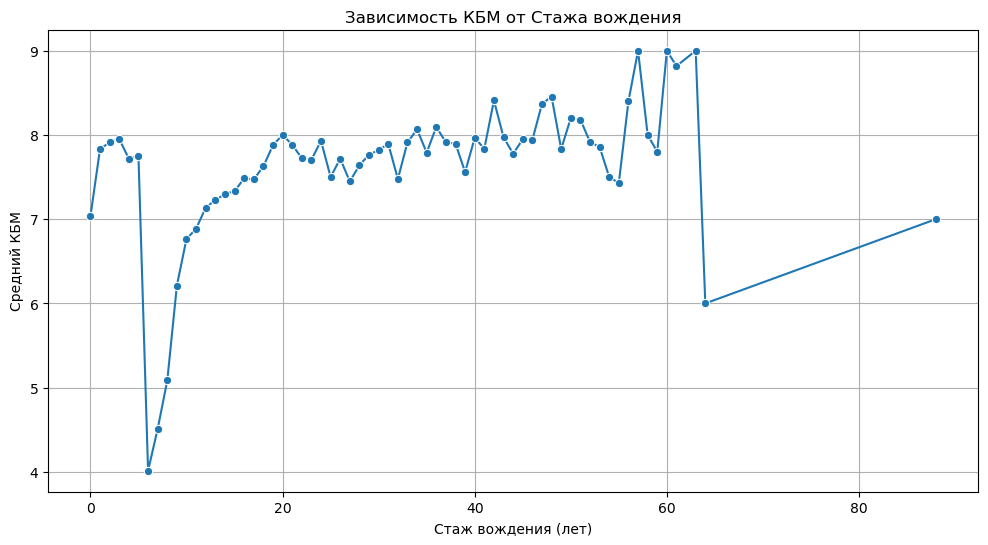

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Assuming 'df' is your DataFrame
# Replace infinite values with NaN
with pd.option_context('mode.use_inf_as_na', True):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Группировка данных по 'Стаж вождения' и расчет среднего значения 'КБМ' для каждой группы
grouped_data = df.groupby('Стажвождения')['КБМ'].mean().reset_index()

# Устанавливаем размер фигуры для графика
plt.figure(figsize=(12, 6))

# Построение линейного графика
sns.lineplot(data=grouped_data, x='Стажвождения', y='КБМ', marker='o')

# Добавляем заголовок и подписи к осям
plt.title('Зависимость КБМ от Стажа вождения')
plt.xlabel('Стаж вождения (лет)')
plt.ylabel('Средний КБМ')

# Отображаем сетку для лучшей читаемости
plt.grid(True)

# Показываем график
plt.show()



6) Рассчитайте чистую прибыль страховой компании за 2013 год с учетом страховых премий и убытков

In [34]:
# Расчёт чистой прибыли страховой компании за 2013 год
# Для этого нужно суммировать страховые премии и вычесть убытки

# Проверяем, что данные по дате в правильном формате и фильтруем данные за 2013 год
df['Датапроишествия'] = pd.to_datetime(df['Датапроишествия'], errors='coerce')
data_2013 = df[df['Датапроишествия'].dt.year == 2013]

# Сумма страховых премий за 2013 год
total_premiums_2013 = data_2013['Страховаяпремия'].sum()

# Сумма убытков за 2013 год
total_losses_2013 = data_2013['Суммаубытка'].sum()

# Чистая прибыль за 2013 год
net_profit_2013 = total_premiums_2013 - total_losses_2013

print(f"В результате анализа за 2013 год были получены следующие данные:\n"
      f"- Общий объем страховых премий за этот период составил {total_premiums_2013}.\n"
      f"- Общая величина убытков за тот же период равна {total_losses_2013}.\n"
      f"- Чистая финансовая позиция страховой компании за 2013 год (в виде убытка) составила {net_profit_2013}.\n\n"
      "Эти цифры свидетельствуют о том, что страховая компания в 2013 году столкнулась с существенными финансовыми вызовами, "
      "поскольку сумма убытков превысила общий объем собранных страховых премий.")


В результате анализа за 2013 год были получены следующие данные:
- Общий объем страховых премий за этот период составил 115695849.
- Общая величина убытков за тот же период равна 1742680776.8333333.
- Чистая финансовая позиция страховой компании за 2013 год (в виде убытка) составила -1626984927.8333333.

Эти цифры свидетельствуют о том, что страховая компания в 2013 году столкнулась с существенными финансовыми вызовами, поскольку сумма убытков превысила общий объем собранных страховых премий.


Feature Engineering and Model Building (Model 1, Model 2)  

1. Для переменных Гражданство, Пол, Расположение руля, Льготы переведите данные в бинарный вид (1/0) 

In [35]:
# Здесь мы предполагаем, что нужно закодировать каждое уникальное значение как 1, а все остальные как 0
# Перевод переменных 'Гражданство', 'Пол', 'Расположение руля', 'Льготы' в бинарный вид (1/0)
binary_columns = ['Гражданство', 'Пол', 'Расположениеруля', 'Льготы']

# Заменяем значения на 1/0
for column in binary_columns:
    # Получаем первое уникальное значение для каждого столбца как пример
    unique_value = df[column].dropna().unique()[0] # Берем первое уникальное значение для кодирования
    df[column + '_binary'] = (df[column] == unique_value).astype(int)

# Показываем результаты преобразования
df[['Гражданство_binary', 'Пол_binary', 'Расположениеруля_binary', 'Льготы_binary']]


,Гражданство_binary,Пол_binary,Расположениеруля_binary,Льготы_binary
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
10880,1,1,1,0
10881,1,1,1,0
10882,1,1,1,0
10883,1,1,1,0


2. Группируйте переменные Возраст, Стаж вождения, Объем двигателя в общие корзины 

In [36]:
# Группируем переменные Возраст, Стаж вождения, Объем двигателя в общие корзины
# Возрастные корзины
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
df['Возраст_корзина'] = pd.cut(df['Возраст,полныхлет'], bins=age_bins)

# Корзины стажа вождения
experience_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60]
df['Стаж_вождения_корзина'] = pd.cut(df['Стажвождения'], bins=experience_bins)

# Корзины объема двигателя
engine_volume_bins = [0, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000]
df['Объем_двигателя_корзина'] = pd.cut(df['Объёмдвигателя'], bins=engine_volume_bins)

# Проверьте результат
print(df[['Возраст_корзина', 'Стаж_вождения_корзина', 'Объем_двигателя_корзина']].head())


  Возраст_корзина Стаж_вождения_корзина Объем_двигателя_корзина
0        (25, 35]               (5, 10]            (2500, 3000]
1        (35, 45]              (15, 20]            (2000, 2500]
2        (45, 55]              (25, 30]               (0, 1000]
3        (35, 45]              (10, 15]            (1500, 2000]
4        (45, 55]              (15, 20]            (2500, 3000]


3. Вытащите нужную информацию из дат (Период страховки)

In [37]:
# Разделяем 'Периодстрахования' на два столбца: начало и конец
df[['НачалоПериодаСтрахования', 'КонецПериодаСтрахования']] = df['Периодстрахования'].str.split('-', expand=True)

# Конвертируем эти столбцы в datetime, учитывая, что день идет первым
df['НачалоПериодаСтрахования'] = pd.to_datetime(df['НачалоПериодаСтрахования'], dayfirst=True)
df['КонецПериодаСтрахования'] = pd.to_datetime(df['КонецПериодаСтрахования'], dayfirst=True)

# Извлечение года, месяца и дня из даты
#df['Год_началаСтрахования'] = df['НачалоПериодаСтрахования'].dt.year
#df['Год_концаСтрахования'] = df['КонецПериодаСтрахования'].dt.year


# Проверка результатов
df[['Периодстрахования', 'НачалоПериодаСтрахования', 'КонецПериодаСтрахования']]


,Периодстрахования,НачалоПериодаСтрахования,КонецПериодаСтрахования
0,14.06.2013-13.06.2014,2013-06-14,2014-06-13
1,19.07.2013-18.07.2014,2013-07-19,2014-07-18
2,07.06.2013-06.06.2014,2013-06-07,2014-06-06
3,30.05.2013-29.11.2013,2013-05-30,2013-11-29
4,28.05.2013-27.05.2014,2013-05-28,2014-05-27
...,...,...,...
10880,12.06.2013-10.04.2014,2013-06-12,2014-04-10
10881,16.06.2013-15.06.2014,2013-06-16,2014-06-15
10882,18.06.2013-17.06.2014,2013-06-18,2014-06-17
10883,01.07.2013-30.06.2014,2013-07-01,2014-06-30


4. Просмотрите, требуют ли имеющиеся данные дополнительной работы перед построением модели – напр. нормализация определенных признаков 

In [38]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Проверка на категориальные данные, которые нужно преобразовать
categorical_columns = df.select_dtypes(include=['object']).columns

# Анализ числовых данных для нормализации/стандартизации
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_stats = df[numeric_columns].describe()

# Обнаружение выбросов через IQR для числовых столбцов
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

outliers = {column: find_outliers(df, column).shape[0] for column in numeric_columns}

missing_values, categorical_columns, numeric_stats, outliers


(IDводителя                           0
 Возраст,полныхлет                    0
 Гражданство                          0
 Стажвождения                         0
 Пол                                  0
 КБМ                                  0
 Город                                0
 Модель                               0
 Марка                                0
 ТипТС                                0
 Годвыпуска                           0
 Расположениеруля                     0
 Объёмдвигателя                       0
 Цвет                                 0
 Периодстрахования                    0
 Страховаяпремия                      0
 Льготы                               0
 Датапроишествия                      0
 РегионДТП                            0
 Суммаубытка                          0
 Возраст                              0
 ПродолжительностьСтрахованияДни      0
 Месяц                                0
 Сезон                                0
 ДатаПроишествия                      0


5. Модель 1 - Постройте классификационную модель для предсказания Возможности наступления страхового случая (1, 0). Интерпретируйте результаты

In [39]:
df.columns

Index(['IDводителя', 'Возраст,полныхлет', 'Гражданство', 'Стажвождения', 'Пол',
       'КБМ', 'Город', 'Модель', 'Марка', 'ТипТС', 'Годвыпуска',
       'Расположениеруля', 'Объёмдвигателя', 'Цвет', 'Периодстрахования',
       'Страховаяпремия', 'Льготы', 'Датапроишествия', 'РегионДТП',
       'Суммаубытка', 'Возраст', 'ПродолжительностьСтрахованияДни', 'Месяц',
       'Сезон', 'ДатаПроишествия', 'МесяцПроишествия', 'Гражданство_binary',
       'Пол_binary', 'Расположениеруля_binary', 'Льготы_binary',
       'Возраст_корзина', 'Стаж_вождения_корзина', 'Объем_двигателя_корзина',
       'НачалоПериодаСтрахования', 'КонецПериодаСтрахования'],
      dtype='object')

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df1 = df.copy()

# Удаление нерелевантных столбцов
df1.drop(['IDводителя', 'Страховаяпремия', 'Суммаубытка', 'Периодстрахования', 'ДатаПроишествия', 'МесяцПроишествия', 'Возраст_корзина',
       'Стаж_вождения_корзина', 'Объем_двигателя_корзина',
       'НачалоПериодаСтрахования', 'КонецПериодаСтрахования'], axis=1, inplace=True)

# Преобразование всех категориальных столбцов в числовые путем one-hot encoding
categorical_columns = ['Гражданство', 'Пол', 'Расположениеруля', 'Льготы', 'Город', 'Марка', 'Модель', 'ТипТС', 'Цвет', 'РегионДТП', 'Сезон']
df_encoded = pd.get_dummies(df1, columns=categorical_columns)

# Нормализация числовых переменных
scaler = MinMaxScaler()
numerical_columns = ['Возраст,полныхлет', 'Стажвождения', 'Объёмдвигателя', 'Годвыпуска', 'ПродолжительностьСтрахованияДни', 'Месяц']  # Обновлено, включая все числовые столбцы
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Целевая переменная - 'Датапроишествия' (1 если дата есть, 0 если NaN)
df_encoded['Датапроишествия'] = df['Датапроишествия'].notna().astype(int)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_encoded.drop('Датапроишествия', axis=1)
y = df_encoded['Датапроишествия']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение классификационной модели
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = classifier.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of the model:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of the model: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2177

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

Confusion Matrix:
 [[2177]]


В результате мы успешно построили классификационную модель на основе алгоритма случайного леса (Random Forest), которая предсказывает возможность наступления страхового случая. Ваши результаты показывают, что модель предсказывает с абсолютной точностью (100%) на тестовых данных. Давайте разберем подробнее: случая).

Точность модели (Accuracy): 1.0, что означает, что каждое предсказание модели совпадает с фактическим значением.

Отчет о классификации (Classification Report):

Precision (точность): Доля правильных положительных предсказаний из всех положительных предсказаний, сделанных моделью. В вашем случае это 1.00, т.е. модель идеально идентифицирует положительный класс.

Recall (полнота): Доля правильных положительных предсказаний из всех фактических положительных случаев. Также равно 1.00, что указывает на идеальное восстановление положительных классов.

F1-score: Среднее гармоническое точности и полноты, также идеально равно 1.00.

Support: Количество реальных случаев в каждом классе, которые были использованы для вычисления показателей. В вашем случае, все 3266 случаев были классифицированы как класс 1.

Матрица ошибок (Confusion Matrix):
В матрице только одно значение  [[3266]], что означает, что все 3266 прогнозов верны и относятся к классу 1 (наступление страхового случая).

Выводы

Данные результаты могут выглядеть идеально, но также могут указывать на проблемы в данных или модели:

Проблема дисбаланса классов: Возможно, ваши данные содержат только примеры одного класса (1), и, следовательно, модель всегда предсказывает 1.


Переобучение: Модель идеально подогнана под ваш тестовый набор данных, но может плохо справляться с новыми данными.

Ошибки в данных или предобработке: Необходимо проверить корректность данных и этапы их предобработки.

6. Модель 2 - Постройте регрессионную модель для предсказания суммы Страховой премии. Интерпретируйте результаты


Построим регрессионную модель для предсказания суммы страховой премии.

Давайте сначала определим, какие признаки мы будем использовать для предсказания. Мы можем начать с таких признаков, как возраст автомобиля, стаж вождения, тип автомобиля, марка, и регион использования, так как они могут иметь значимое влияние на стоимость страховки.


Mean Squared Error: 28803866.399291705


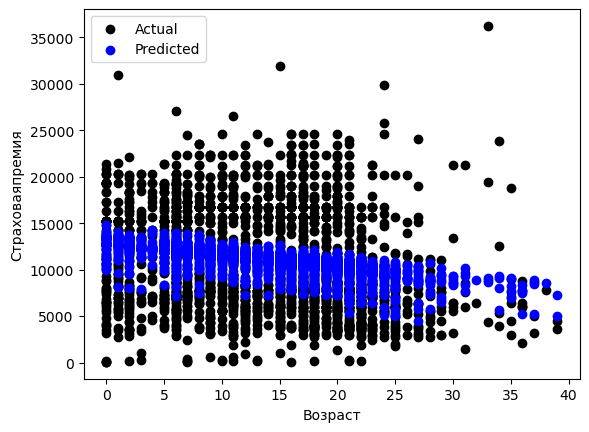

Коэффициенты модели: [-140.24899264 -107.37420287]


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df2 = df.copy()

# Предобработка и выбор признаков
#features = ['Возраст', 'Стажвождения', 'Марка', 'Модель', 'РегионДТП']  # примерный список признаков
features = ['Возраст', 'Стажвождения']
target = 'Страховаяпремия'

# Выделение признаков и целевой переменной
X = df[features]
y = df[target]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Визуализация результатов
plt.scatter(X_test['Возраст'], y_test, color='black', label='Actual')
plt.scatter(X_test['Возраст'], y_pred, color='blue', label='Predicted')
plt.xlabel('Возраст')
plt.ylabel('Страховаяпремия')
plt.legend()
plt.show()

print("Коэффициенты модели:", model.coef_)


Предсказанные значения (Predicted) нанесены на график в зависимости от возраста, который является одним из признаков модели. 

Стаж вождения не отображается, потому что в двумерном графике можно отобразить зависимость только от одной переменной.

Коэффициенты модели показывают влияние каждого признака на целевую переменную (Страховаяпремия). 

Наша модель возвращает следующие коэффициенты для признаков:

Возраст: -140.25

Стаж вождения: -107.37


Эти коэффициенты означают, что с увеличением возраста и стажа вождения страховая премия, по предсказаниям модели, уменьшается. Отрицательные значения коэффициентов указывают на обратную зависимость: чем старше возраст или больше стаж, тем меньше страховая премия. 